# Predicting Diabetes Using Tree-Based Methods

The dataset I will be using in the following parts is the "Pima Indians Diabetes Dataset". This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

## Objective of Project

 The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### There are two data files: 
"Diabetes_training.csv" <br />
"Diabetes_Xtest.csv" 

Training dataset, "Diabetes_training.csv", contains 576 rows and 9 columns. This is the training set containing both of the features and the target. Test dataset, "Diabetes_Xtest.csv", contains 192 rows and 8 columns. This is the test set which only contains the features. Prediction task is to determine the test for diabetes.
Both files have the following fields, except quality which is not available in "Diabetes_Xtest.csv".

#### Features:

1 - pregnant: Number of times pregnant<br />
2 - glucose: Plasma glucose concentration (glucose tolerance test)<br />
3 - pressure: Diastolic blood pressure (mm Hg)<br />
4 - triceps: Triceps skin fold thickness (mm)<br />
5 - insulin: 2-Hour serum insulin (mu U/ml)<br />
6 - mass: Body mass index (weight in kg/(height in m)^2)<br />
7 - pedigree: Diabetes pedigree function<br />
8 - age: Age (years)

#### Target:

diabetes: ('neg','pos')



## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load training data and test data 

In [2]:
df_train = pd.read_csv('Diabetes_training.csv')
df_test = pd.read_csv('Diabetes_Xtest.csv')

## Exploratory data analysis

In [3]:
# inspect first few rows of the data
df_train.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,13,129,0,30,0,39.9,0.569,44,pos
1,9,184,85,15,0,30.0,1.213,49,pos
2,3,193,70,31,0,34.9,0.241,25,pos
3,4,146,78,0,0,38.5,0.520,67,pos
4,3,174,58,22,194,32.9,0.593,36,pos


In [4]:
# check if there are any missing values in the data
df_train.isnull().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [5]:
# quick overview of statistics of data
df_train.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.918403,120.604167,68.682292,20.248264,81.696181,31.831597,0.481278,33.383681
std,3.382092,32.344121,19.624867,16.091991,121.266274,7.729123,0.350936,11.891554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.800000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,22.000000,20.000000,31.600000,0.374500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.525000,0.631750,40.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000


### Some takeaways

from the data observed, we see that many of the features above have min of 0. This doesn't make sense for glucose, pressure, triceps, insulin, and mass. Let's take a deeper look into the data.

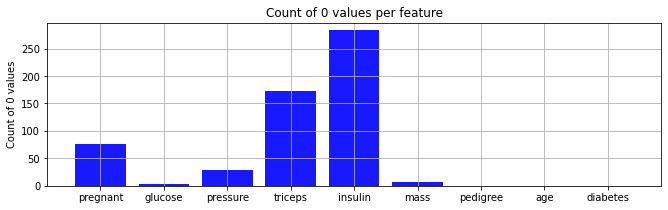

In [6]:
# Missing Or Unwanted 0 values 
featurelist = []
count_of_zero_list = []

for col in df_train:
    cnt = 0
    for i in df_train[col]:
        if i==0:
            cnt = cnt + 1
    if col!='Outcome':
        #print (col, "-", cnt)
        featurelist.append(col)
        count_of_zero_list.append(cnt)
        
objects = tuple(featurelist)
y_pos = np.arange(len(featurelist))
performance = count_of_zero_list
 
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 11
fig_size[1] = 3

plt.bar(y_pos, performance, align='center', color='b', alpha=0.9)
plt.xticks(y_pos, objects)

plt.ylabel('Count of 0 values')
plt.title('Count of 0 values per feature')
plt.grid(True)

plt.show()

We clearly see that some catagories have very high count of 0 values. We will be replacing 0 values with either mean or median values for specific columns. To get the mean or median, we will have to filter out the zero values from the data frame to get a more accurate number.

In [7]:
# filter out the values that are not zero
glucose_nonzero = df_train.loc[df_train['glucose'] != 0]
pressure_nonzero = df_train.loc[df_train['pressure'] != 0]
triceps_nonzero = df_train.loc[df_train['triceps'] != 0]
insulin_nonzero = df_train.loc[df_train['insulin'] != 0]
mass_nonzero = df_train.loc[df_train['mass'] != 0]

# Correcting missing values in glucose, pressure, triceps, insulin, mass
df_train['glucose'] = df_train['glucose'].replace(0,glucose_nonzero['glucose'].mean())
df_train['pressure'] = df_train['pressure'].replace(0,pressure_nonzero['pressure'].mean())
df_train['triceps'] = df_train['triceps'].replace(0,triceps_nonzero['triceps'].median())
df_train['insulin'] = df_train['insulin'].replace(0,insulin_nonzero['insulin'].median())
df_train['mass'] = df_train['mass'].replace(0,mass_nonzero['mass'].mean())


In [8]:
df_train.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.918403,121.447552,72.191606,28.958333,144.093750,32.223199,0.481278,33.383681
std,3.382092,30.728642,11.987013,9.090942,92.360908,6.874036,0.350936,11.891554
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,24.000000,125.000000,27.100000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,29.000000,127.000000,32.000000,0.374500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.525000,0.631750,40.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000


## Correlation

Check for multicolineary

<AxesSubplot:>

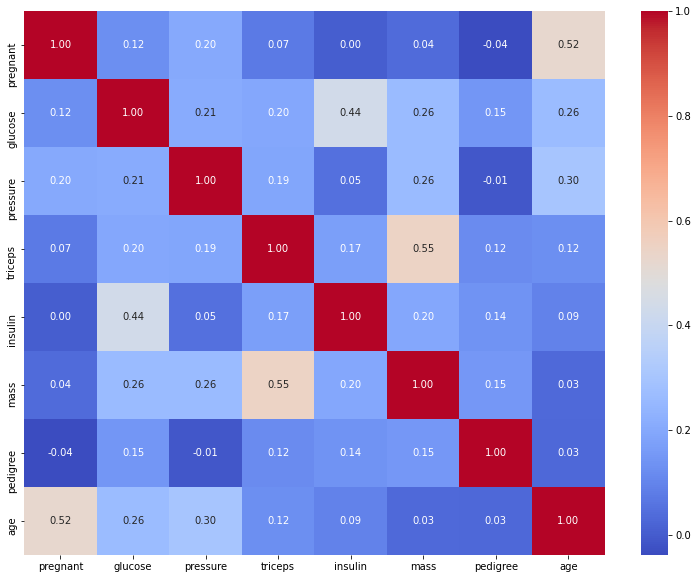

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(df_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## Split training data into X and y


In [10]:
X, y = df_train.drop('diabetes', axis=1), df_train['diabetes']

# transfrom the target as binary values: "pos" is 1, "neg" is 0
y = y.map({'pos': 1, 'neg': 0})

## Standardize the features on training and test set

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X.values)
X = pd.DataFrame(scaler.transform(X.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

## Splitting training data into training and validation set 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=20) 

## Random Forest

Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.

From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=30)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_val) 

## Design Accuracy Functions

Implement my_precision( ), my_recall( ), my_accuracy( ) functions to gain insights on the predicted values from the random forest model with default parameters

In [14]:
def my_precision(y_val, y_pred): #TP/(TP+FP)
    TP = len([val for i, val in enumerate(y_val) if y_pred[i] == 1 and val == 1])
    FP = len([val for i, val in enumerate(y_val) if y_pred[i] == 1 and val == 0])
    return TP/(TP+FP)

def my_recall(y_val, y_pred): #TP/(TP+FN)
    TP = len([val for i, val in enumerate(y_val) if y_pred[i] == 1 and val == 1])
    FN = len([val for i, val in enumerate(y_val) if y_pred[i] == 0 and val == 1])
    return TP/(TP+FN)

def my_accuracy(y_val, y_pred): #(TP+TN)/(TP+FP+FN+TN)
    TP = len([val for i, val in enumerate(y_val) if y_pred[i] == 1 and val == 1])
    TN = len([val for i, val in enumerate(y_val) if y_pred[i] == 0 and val == 0])
    FN = len([val for i, val in enumerate(y_val) if y_pred[i] == 0 and val == 1])
    FP = len([val for i, val in enumerate(y_val) if y_pred[i] == 1 and val == 0])
    return (TP+TN)/(TP+FP+FN+TN)

## Print accuracy, precision and recall for the predictions

In [15]:
print('my accuracy: ', my_accuracy(y_val, y_pred))
print('my precision: ', my_precision(y_val, y_pred))
print('my recall: ', my_recall(y_val, y_pred))

my accuracy:  0.791907514450867
my precision:  0.6333333333333333
my recall:  0.7307692307692307


## Plot ROC curve and obtain AUC for the validation predictions

In [16]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

probs = model_rf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, _ = roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ', roc_auc)

AUC:  0.8432930705657978


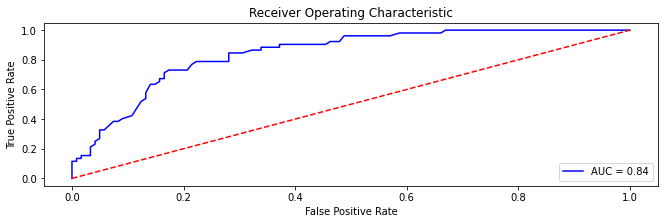

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [23]:
from sklearn.model_selection import GridSearchCV

# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [7, 8, 9],
    'max_features': ['auto', 'sqrt', 'log2', 8],
    'min_samples_leaf': [5, 15, 25],
    'min_samples_split': [2, 5, 8],
    'n_estimators': [25, 30, 35]
}

model_rf = RandomForestClassifier(random_state=30)


In [24]:
# Fit on the training data with all sets of parameters.

grid_search = GridSearchCV(estimator = model_rf, scoring='recall', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit on the training data with all sets of parameters.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits

[CV] END max_depth=9, max_features=auto, min_samples_leaf=25, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=25, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=25, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=25, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.9s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=60; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total t

In [22]:
# best param
grid_search.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
# Print the best score
grid_search.best_score_

In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.
rf = RandomForestClassifier(**grid_search.best_params_, random_state=30)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train) 
y_preds = rf.predict(X_val) 

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###
print('Make predictions on training set')
print('my accuracy: ', my_accuracy(y_val, y_preds))
print('my precision: ', my_precision(y_train, y_train_pred))
print('my recall: ', my_recall(y_train, y_train_pred))
print()

### Make predictions on the validation set and display accuracy, precision and recall. 
### WRITE CODE HERE ###
print('Make predictions on validation set')
print('my accuracy: ', my_accuracy(y_val, y_preds))
print('my precision: ', my_precision(y_val, y_preds))
print('my recall: ', my_recall(y_val, y_preds))

In [ ]:
probs = rf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, _ = roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()